In [1]:
import numpy as np
import time
from joblib import Parallel, delayed
import multiprocessing
import matplotlib.pyplot as plt


In [9]:
# Creamos un conjunto grande de puntos en un espacio de 3 dimensiones
num_points = 10**2
points = np.random.rand(num_points, 3)

# Inicializamos una matriz para almacenar las distancias
distances = np.zeros((num_points, num_points))

# Función para calcular la distancia euclidiana entre dos puntos
def compute_distance(i, j):
  return np.sqrt(np.sum((points[i] - points[j]) ** 2))

# Función para calcular las distancias usando bucles for anidados
def using_for_loops():
  start_time = time.time()
  for i in range(num_points):
      for j in range(num_points):
          distances[i, j] = np.sqrt(np.sum((points[i] - points[j]) ** 2))
  end_time = time.time()
  return end_time - start_time

# Función para calcular las distancias usando vectorización
def using_vectorization():
  start_time = time.time()
  diff = points[:, np.newaxis, :] - points[np.newaxis, :, :]
  distances = np.sqrt(np.sum(diff ** 2, axis=-1))
  end_time = time.time()
  return end_time - start_time

# Función para calcular las distancias usando Joblib
def using_joblib():
  start_time = time.time()
  Parallel(n_jobs=-1)(
      delayed(compute_distance)(i, j) for i in range(num_points) for j in range(num_points)
  )
  end_time = time.time()
  return end_time - start_time

# Función para calcular las distancias usando multiprocessing
def using_multiprocessing():
  start_time = time.time()
  args = [(i, j) for i in range(num_points) for j in range(num_points)]
  with multiprocessing.Pool() as pool:
      results = pool.starmap(compute_distance, args)
  distances = np.array(results).reshape((num_points, num_points))
  end_time = time.time()
  return end_time - start_time

# Llamamos a las funciones de temporización
using_for_loops()
using_vectorization()
using_joblib()
using_multiprocessing()

0.14968013763427734

For loops: mean = 0.08336560726165772 , std = 0.031062025671858937
Vectorization: mean = 0.0006624937057495117 , std = 0.00017093814215400497
Joblib: mean = 0.2623038053512573 , std = 0.07623934197845442
Multiprocessing: mean = 0.17110395431518555 , std = 0.03879685336406477


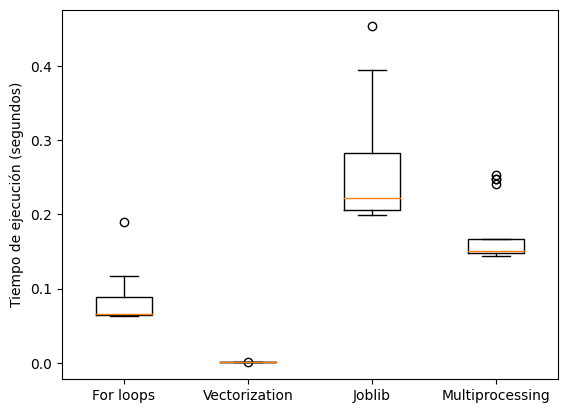

In [12]:
# Número de simulaciones
num_simulations = 20

# Listas para almacenar los tiempos de ejecución de cada función
for_loops_times = []
vectorization_times = []
joblib_times = []
multiprocessing_times = []

# Ejecutamos las simulaciones
for _ in range(num_simulations):
  for_loops_times.append(using_for_loops())
  vectorization_times.append(using_vectorization())
  joblib_times.append(using_joblib())
  multiprocessing_times.append(using_multiprocessing())

# Calculamos las estadísticas básicas
for_loops_mean = np.mean(for_loops_times)
vectorization_mean = np.mean(vectorization_times)
joblib_mean = np.mean(joblib_times)
multiprocessing_mean = np.mean(multiprocessing_times)

for_loops_std = np.std(for_loops_times)
vectorization_std = np.std(vectorization_times)
joblib_std = np.std(joblib_times)
multiprocessing_std = np.std(multiprocessing_times)

# Imprimimos las estadísticas básicas
print("For loops: mean =", for_loops_mean, ", std =", for_loops_std)
print("Vectorization: mean =", vectorization_mean, ", std =", vectorization_std)
print("Joblib: mean =", joblib_mean, ", std =", joblib_std)
print("Multiprocessing: mean =", multiprocessing_mean, ", std =", multiprocessing_std)

# Graficamos los tiempos de ejecución
plt.boxplot([for_loops_times, vectorization_times, joblib_times, multiprocessing_times])
plt.xticks([1, 2, 3, 4], ["For loops", "Vectorization", "Joblib", "Multiprocessing"])
plt.ylabel("Tiempo de ejecución (segundos)")
plt.show()